In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model_data = pd.read_csv('winequality-red.csv')

In [37]:
# Finding correlation between the columns
corr = model_data.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [38]:
#Creating the testing and training dataset
x = model_data[['volatile acidity','citric acid','sulphates','alcohol']]
y = model_data['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 101)

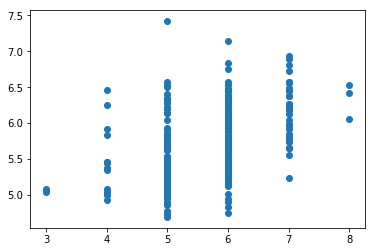

In [45]:
#Creating and training the model
lm = LinearRegression(normalize=True)
lm.fit(x_train,y_train)

prediction_test = lm.predict(x_test)
plt.scatter(y_test,prediction_test)
plt.show()

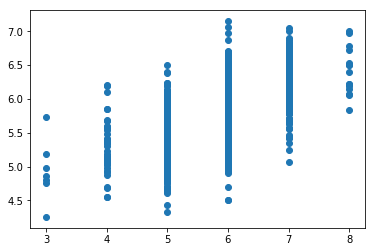

In [31]:
prediction_train = lm.predict(x_train)
plt.scatter(y_train,prediction_train)
plt.show()

In [32]:
#Caluclating metrics for test
from sklearn import metrics
print('MAE : ',metrics.mean_absolute_error(y_test,prediction_test))
print('MSE : ',metrics.mean_squared_error(y_test,prediction_test))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,prediction_test)))


MAE :  0.5551716901949157
MSE :  0.5316556524603119
RMSE :  0.7291472090465079


In [33]:
#calculating metrics for train

print('MAE : ',metrics.mean_absolute_error(y_train,prediction_train))
print('MSE : ',metrics.mean_squared_error(y_train,prediction_train))
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))


MAE :  0.5064181641996354
MSE :  0.4088224571078859
RMSE :  0.6393922560587404


In [34]:
R2_test = metrics.r2_score(y_test,prediction_test)
adjusted_R2_test = 1-(1-R2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print('R2 test value : ', R2_test)
print('Adjusted_R2_test_value : ',adjusted_R2_test)

R2 test value :  0.23209294160550764
Adjusted_R2_test_value :  0.22234174086399028


In [35]:
R2_train = metrics.r2_score(y_train,prediction_train)
adjusted_R2_train = 1-(1-R2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print('R2 train value : ', R2_train)
print('Adjusted_R2_train_value : ',adjusted_R2_train)

R2 train value :  0.36208243234892024
Adjusted_R2_train_value :  0.3600795514457771
